# Cab Investment Analysis



In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import os
path = "C:/Users/JOAO/Documents/Data Glacier/DataGlacier/Week2/Cab Investment Case Study/"
os.chdir(path)
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

dfs = {}
dfs['Cab_Data'] = cab_data
dfs['City'] = city
dfs['Customer'] = customer
dfs['Transaction'] = transaction

In [201]:
holidays = pd.read_csv('USHoliday.csv')
holidays['Date'] = pd.to_datetime(holidays['Date']).dt.date
holidays = holidays[holidays.Year.between(2016, 2018)][['Date', 'Holiday', 'WeekDay']]
dfs['Holiday'] = holidays
holidays.head()

,Date,Holiday,WeekDay
12,2016-07-04,4th of July,Monday
13,2017-07-04,4th of July,Tuesday
14,2018-07-04,4th of July,Wednesday
30,2016-12-25,Christmas Day,Sunday
31,2017-12-25,Christmas Day,Monday


In [4]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [7]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [8]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [9]:
def convert_date(row):
    start = dt.datetime(1899, 12, 31)
    ordinal = row['Date of Travel']
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (start + dt.timedelta(days=ordinal)).replace(microsecond=0).date()

In [10]:
cab_data['Date of Travel'] = cab_data.apply(convert_date, axis = 1)

In [11]:
city.replace(',','', regex=True, inplace = True)
city['Population'] = city['Population'].astype(int)
city['Users'] = city['Users'].astype(int)

In [13]:
city['Users/100k'] = city.Users / city.Population * 100000
city.sort_values(by = 'Users/100k', ascending = False)

,City,Population,Users,Users/100k
14,SAN FRANCISCO CA,629591,213609,33928.216890
19,BOSTON MA,248968,80021,32141.078372
17,WASHINGTON DC,418859,127001,30320.704581
2,LOS ANGELES CA,1595037,144132,9036.279409
1,CHICAGO IL,1955130,164468,8412.126048
6,SAN DIEGO CA,959307,69995,7296.412931
12,SEATTLE WA,671238,25063,3733.847011
0,NEW YORK NY,8405837,302149,3594.514145
9,ATLANTA GA,814885,24701,3031.225265
18,NASHVILLE TN,327225,9270,2832.913133


In [14]:
for key, df in dfs.items():
    print('*****{}*****\n{}\n'.format(key, df.dtypes))

*****Cab_Data*****
Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

*****City*****
City           object
Population      int32
Users           int32
Users/100k    float64
dtype: object

*****Customer*****
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

*****Transaction*****
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

*****Holiday*****
Date       datetime64[ns]
Holiday            object
WeekDay            object
dtype: object



In [15]:
for key, df in dfs.items():
    print('\n*****{}***** --> {} rows'.format(key, df.shape[0]))
    print(df.isna().any())


*****Cab_Data***** --> 359392 rows
Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
dtype: bool

*****City***** --> 20 rows
City          False
Population    False
Users         False
Users/100k    False
dtype: bool

*****Customer***** --> 49171 rows
Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
dtype: bool

*****Transaction***** --> 440098 rows
Transaction ID    False
Customer ID       False
Payment_Mode      False
dtype: bool

*****Holiday***** --> 57 rows
Date       False
Holiday    False
WeekDay    False
dtype: bool


In [16]:
data = cab_data.merge(transaction, how = 'left', on = 'Transaction ID')
data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [17]:
print(data.columns)
print(city.columns)
print(customer.columns)
print(holidays.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')
Index(['City', 'Population', 'Users', 'Users/100k'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Date', 'Holiday', 'WeekDay'], dtype='object')


In [18]:
data['Profit'] = data['Price Charged'] - data['Cost of Trip']
data['Margin'] =  data['Profit']/data['Price Charged']
data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Profit,Margin
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,137.253198,0.271284
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,160.311840,0.185501
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,-220.060000,-0.693015
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,28.012000,0.138559
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,81.962000,0.264303
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,190.030000,0.416120
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,1463.966000,0.762026


# Comparison of Price per km travelled by city

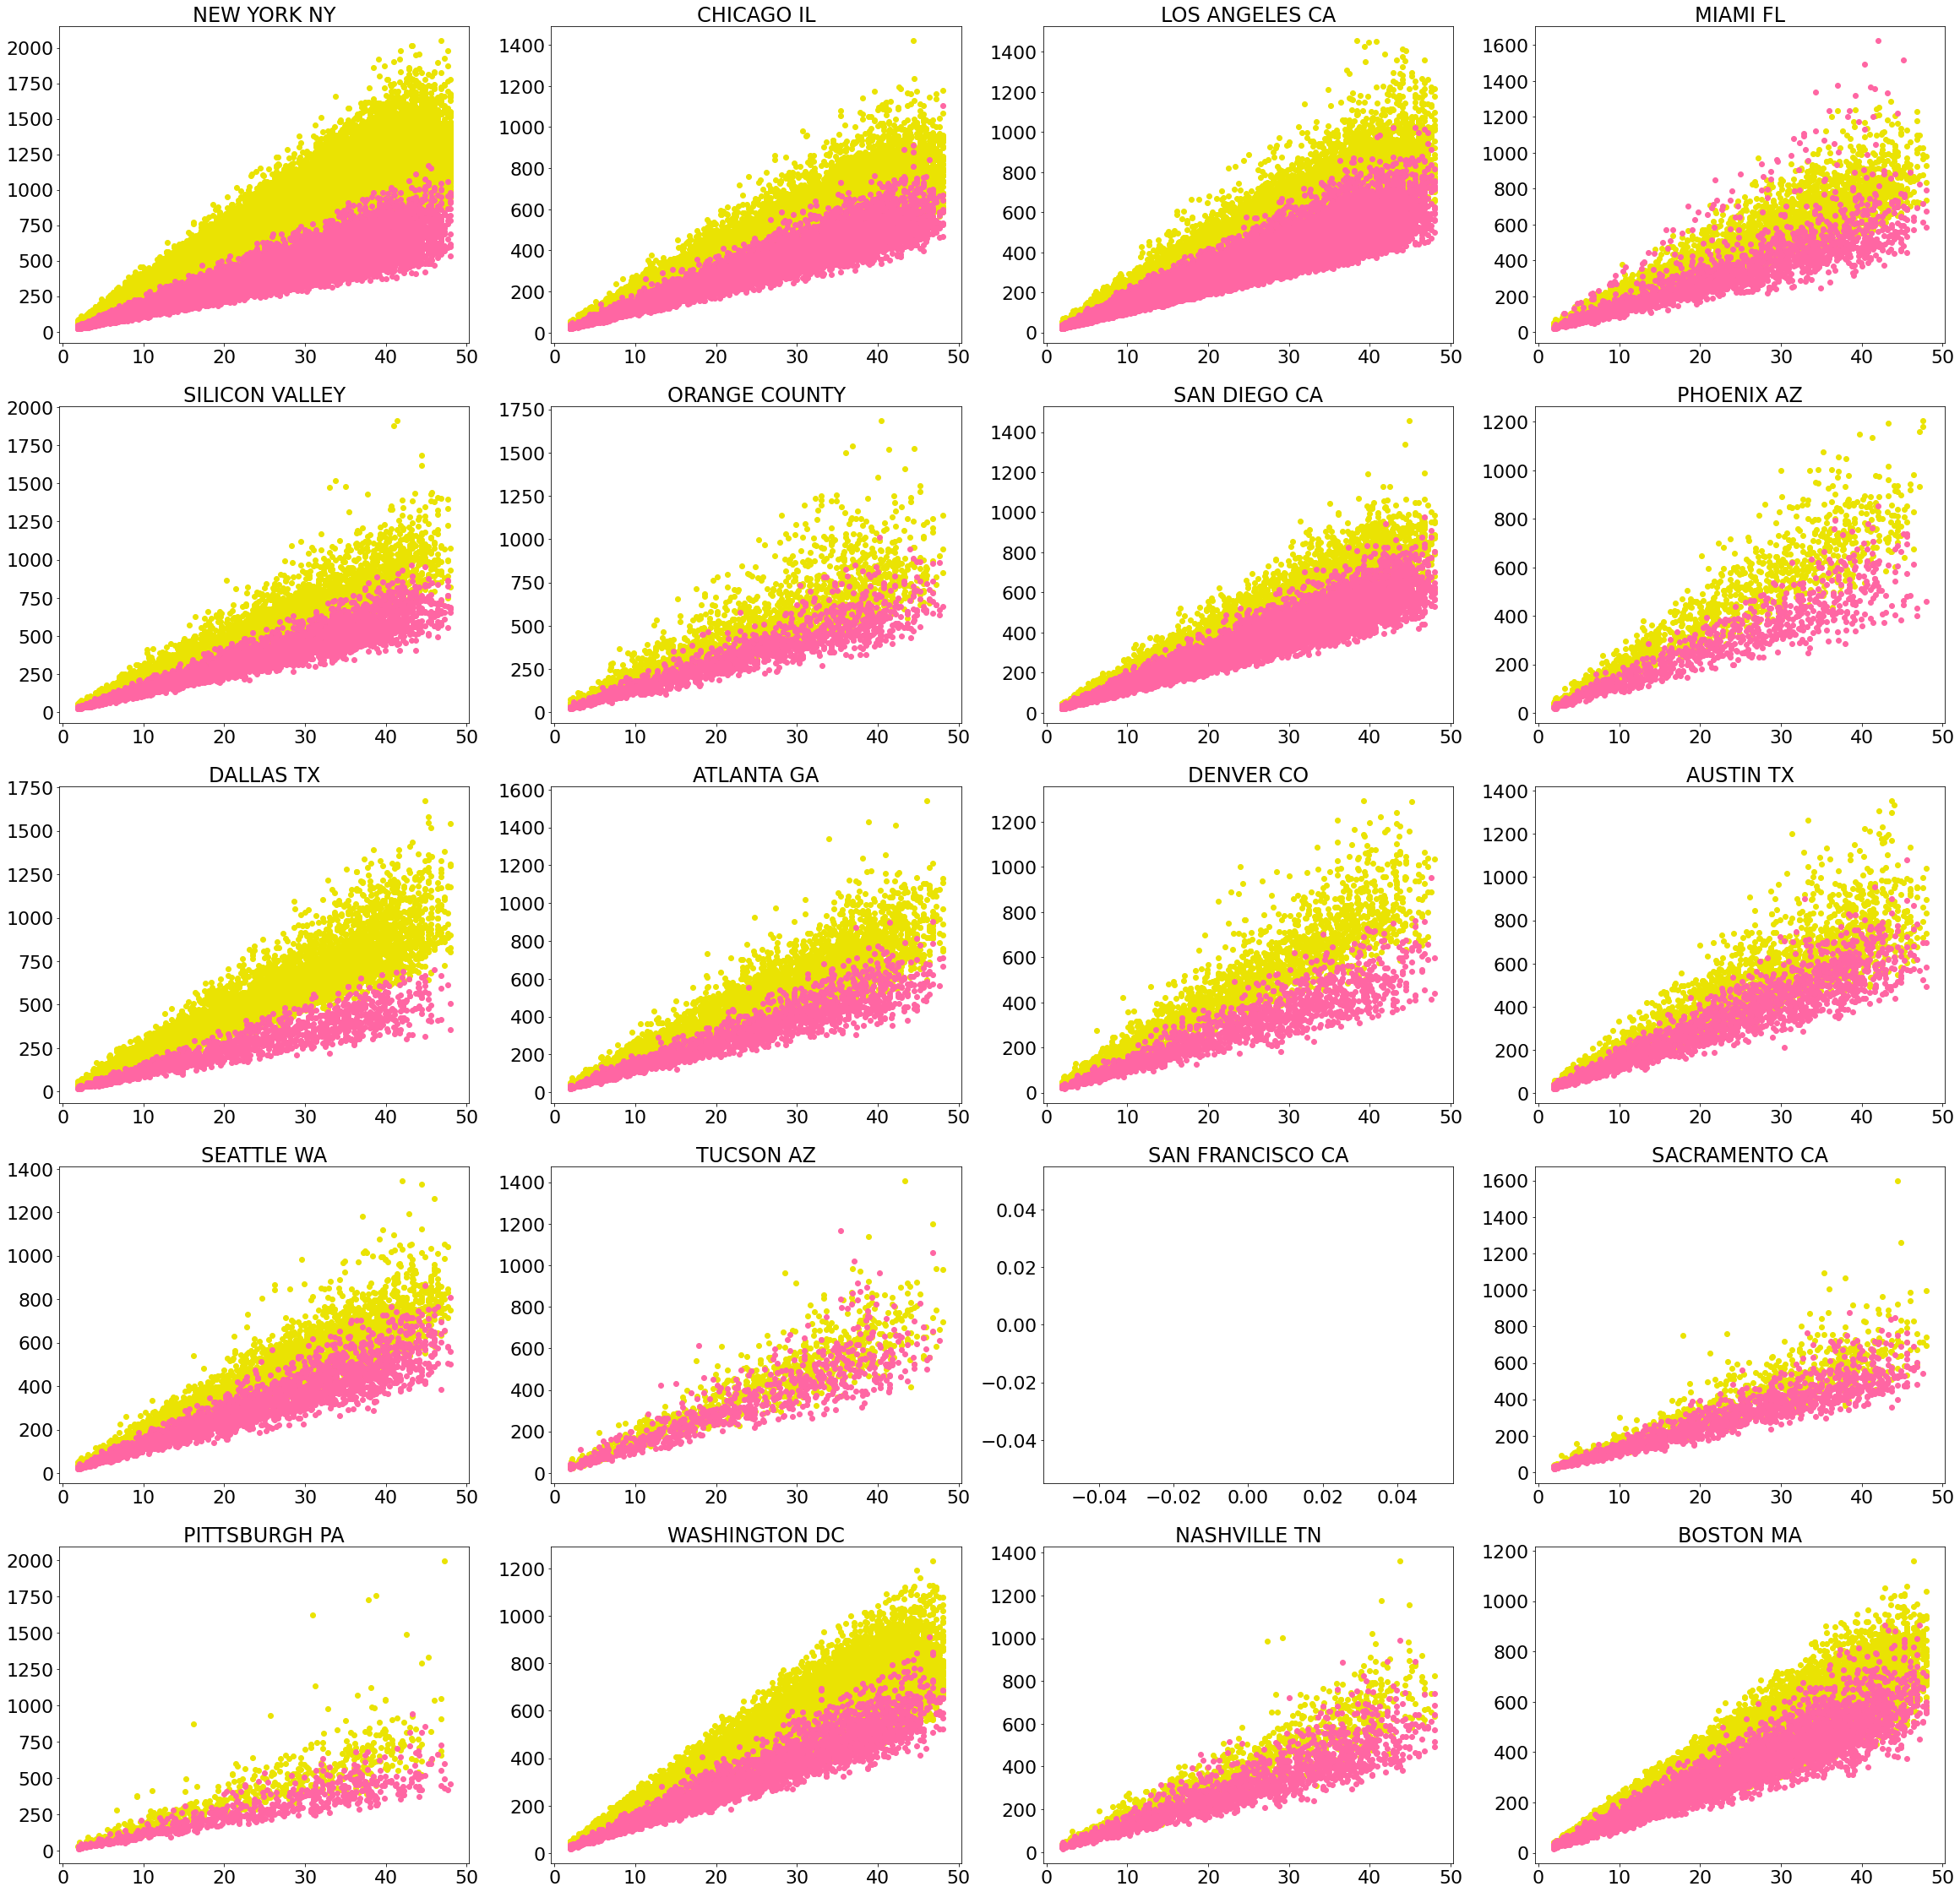

In [38]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(city.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Price Charged'], color = '#EAE303')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Price Charged'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show()

# Comparison of cost per km travelled by city

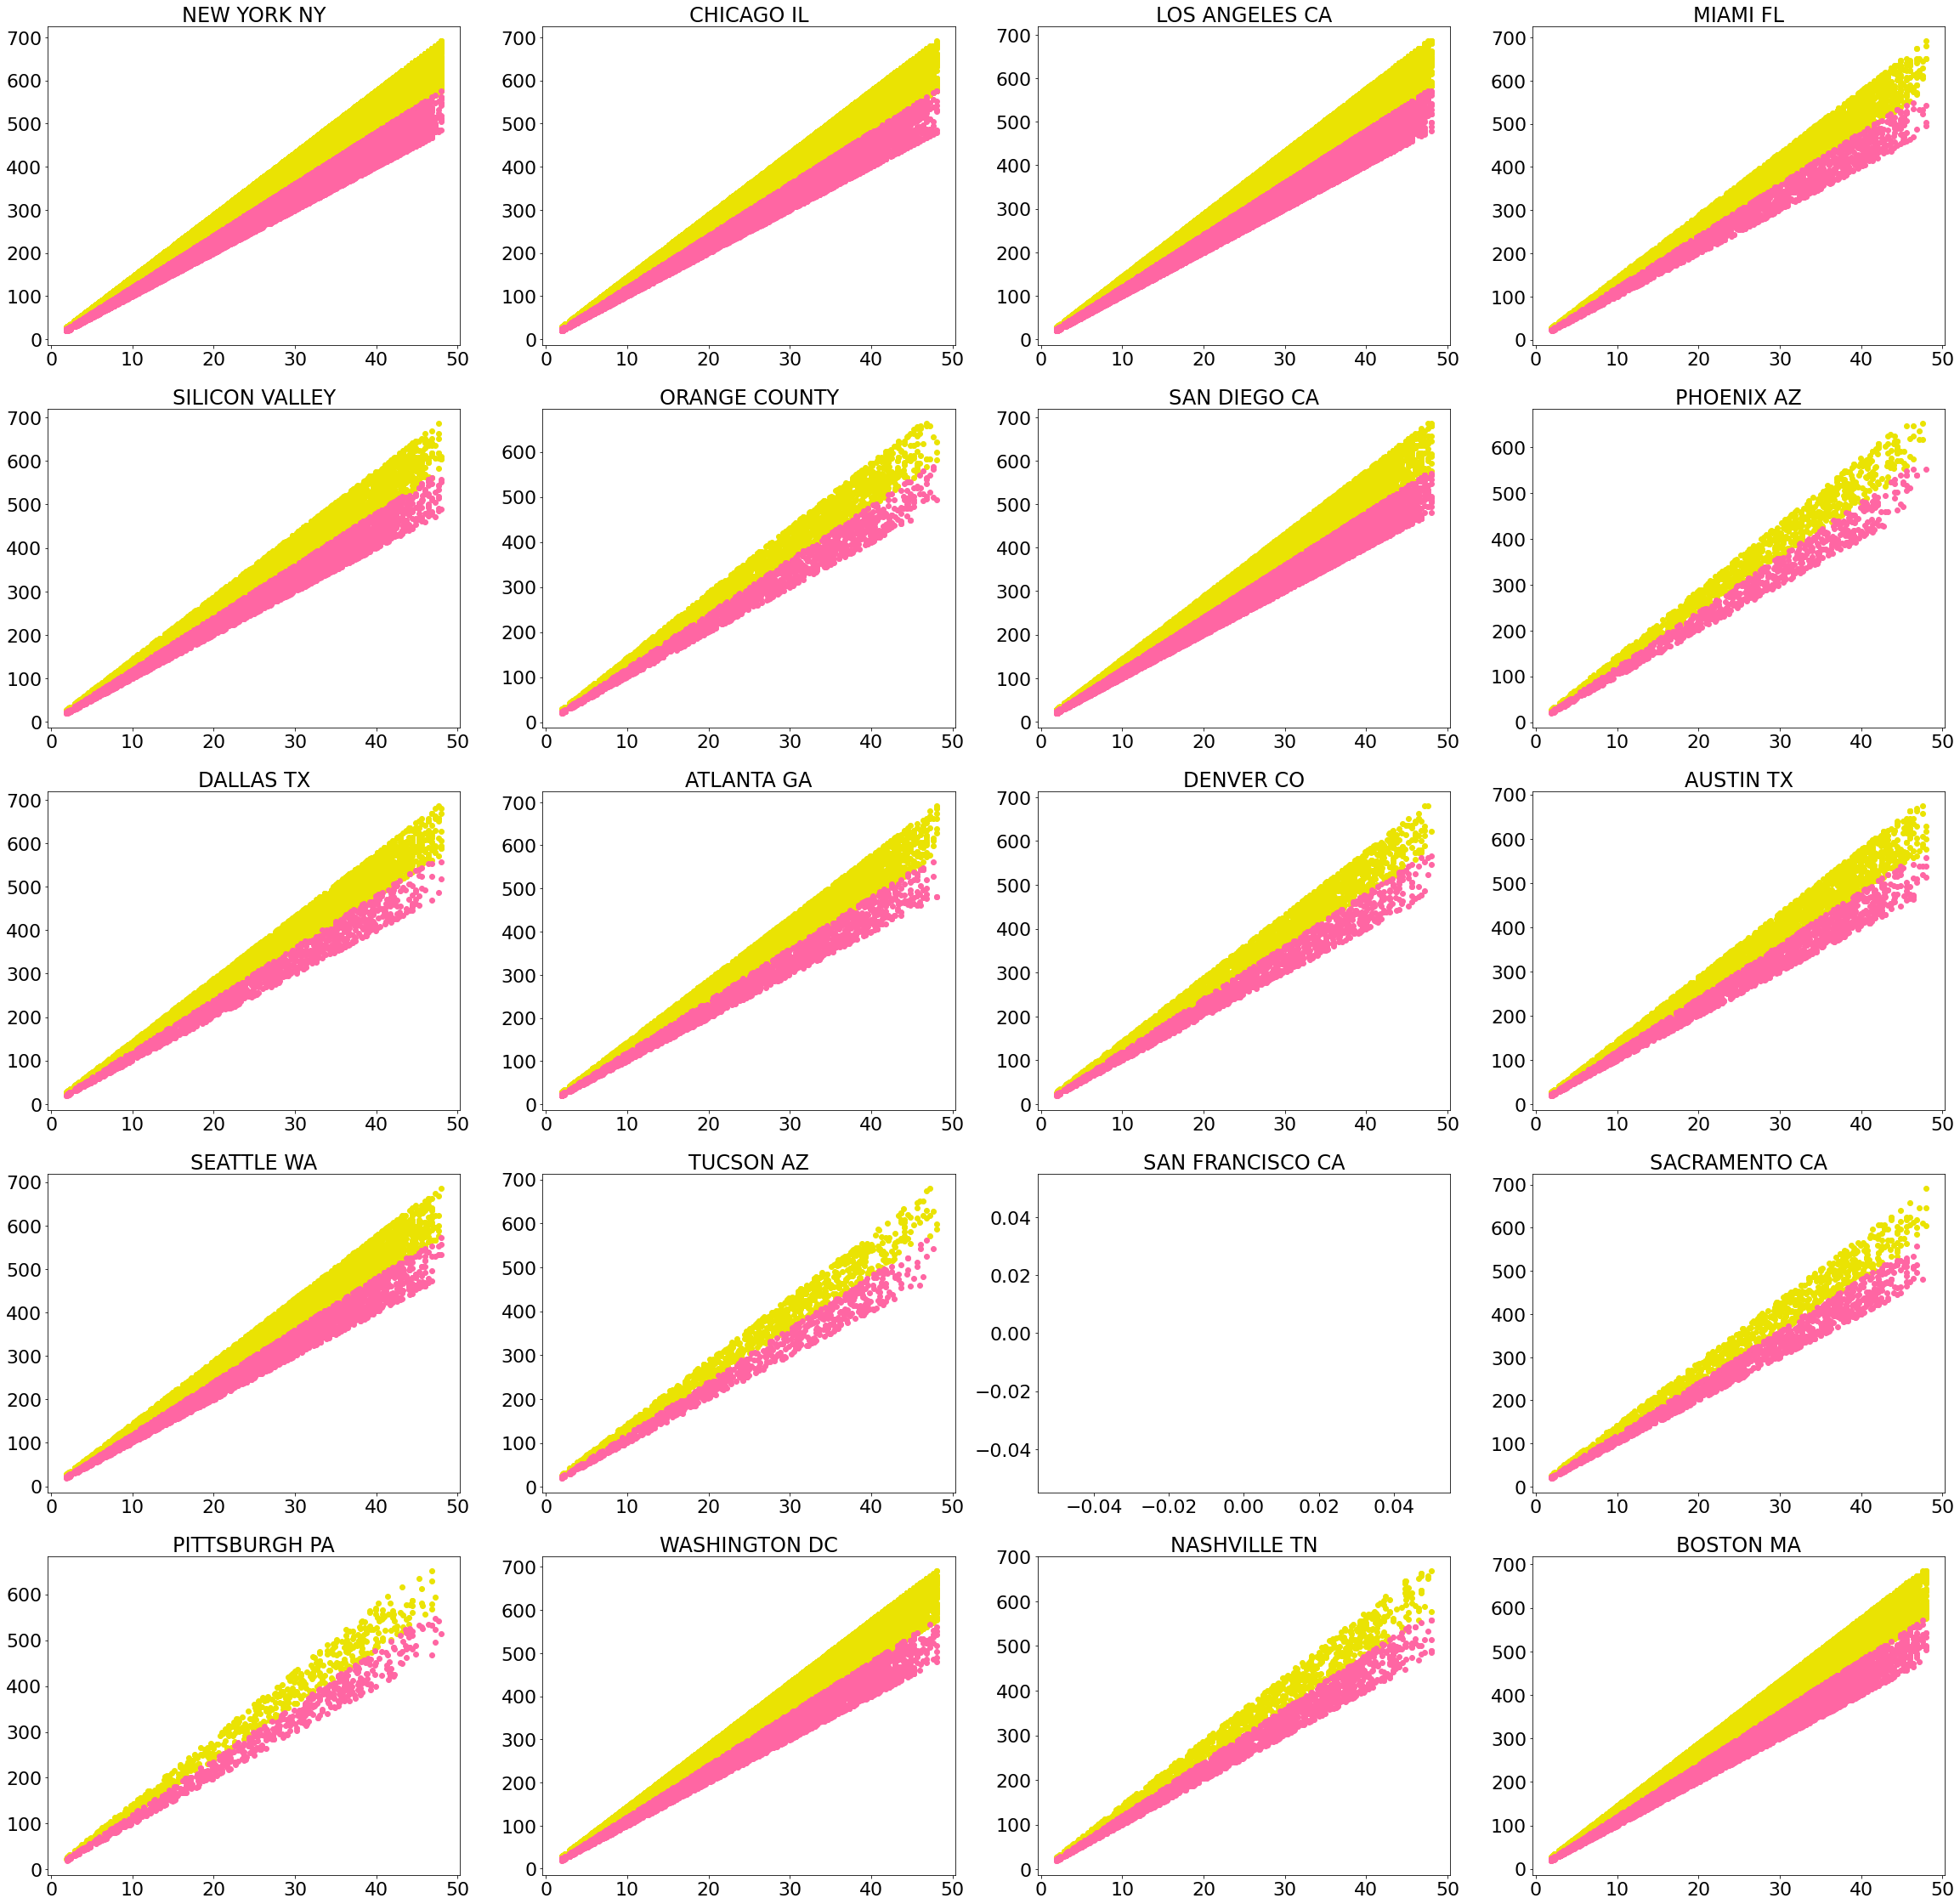

In [20]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(city.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Cost of Trip'], color = '#EAE303')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Cost of Trip'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show() 

# Comparison of profit per km travelled by city

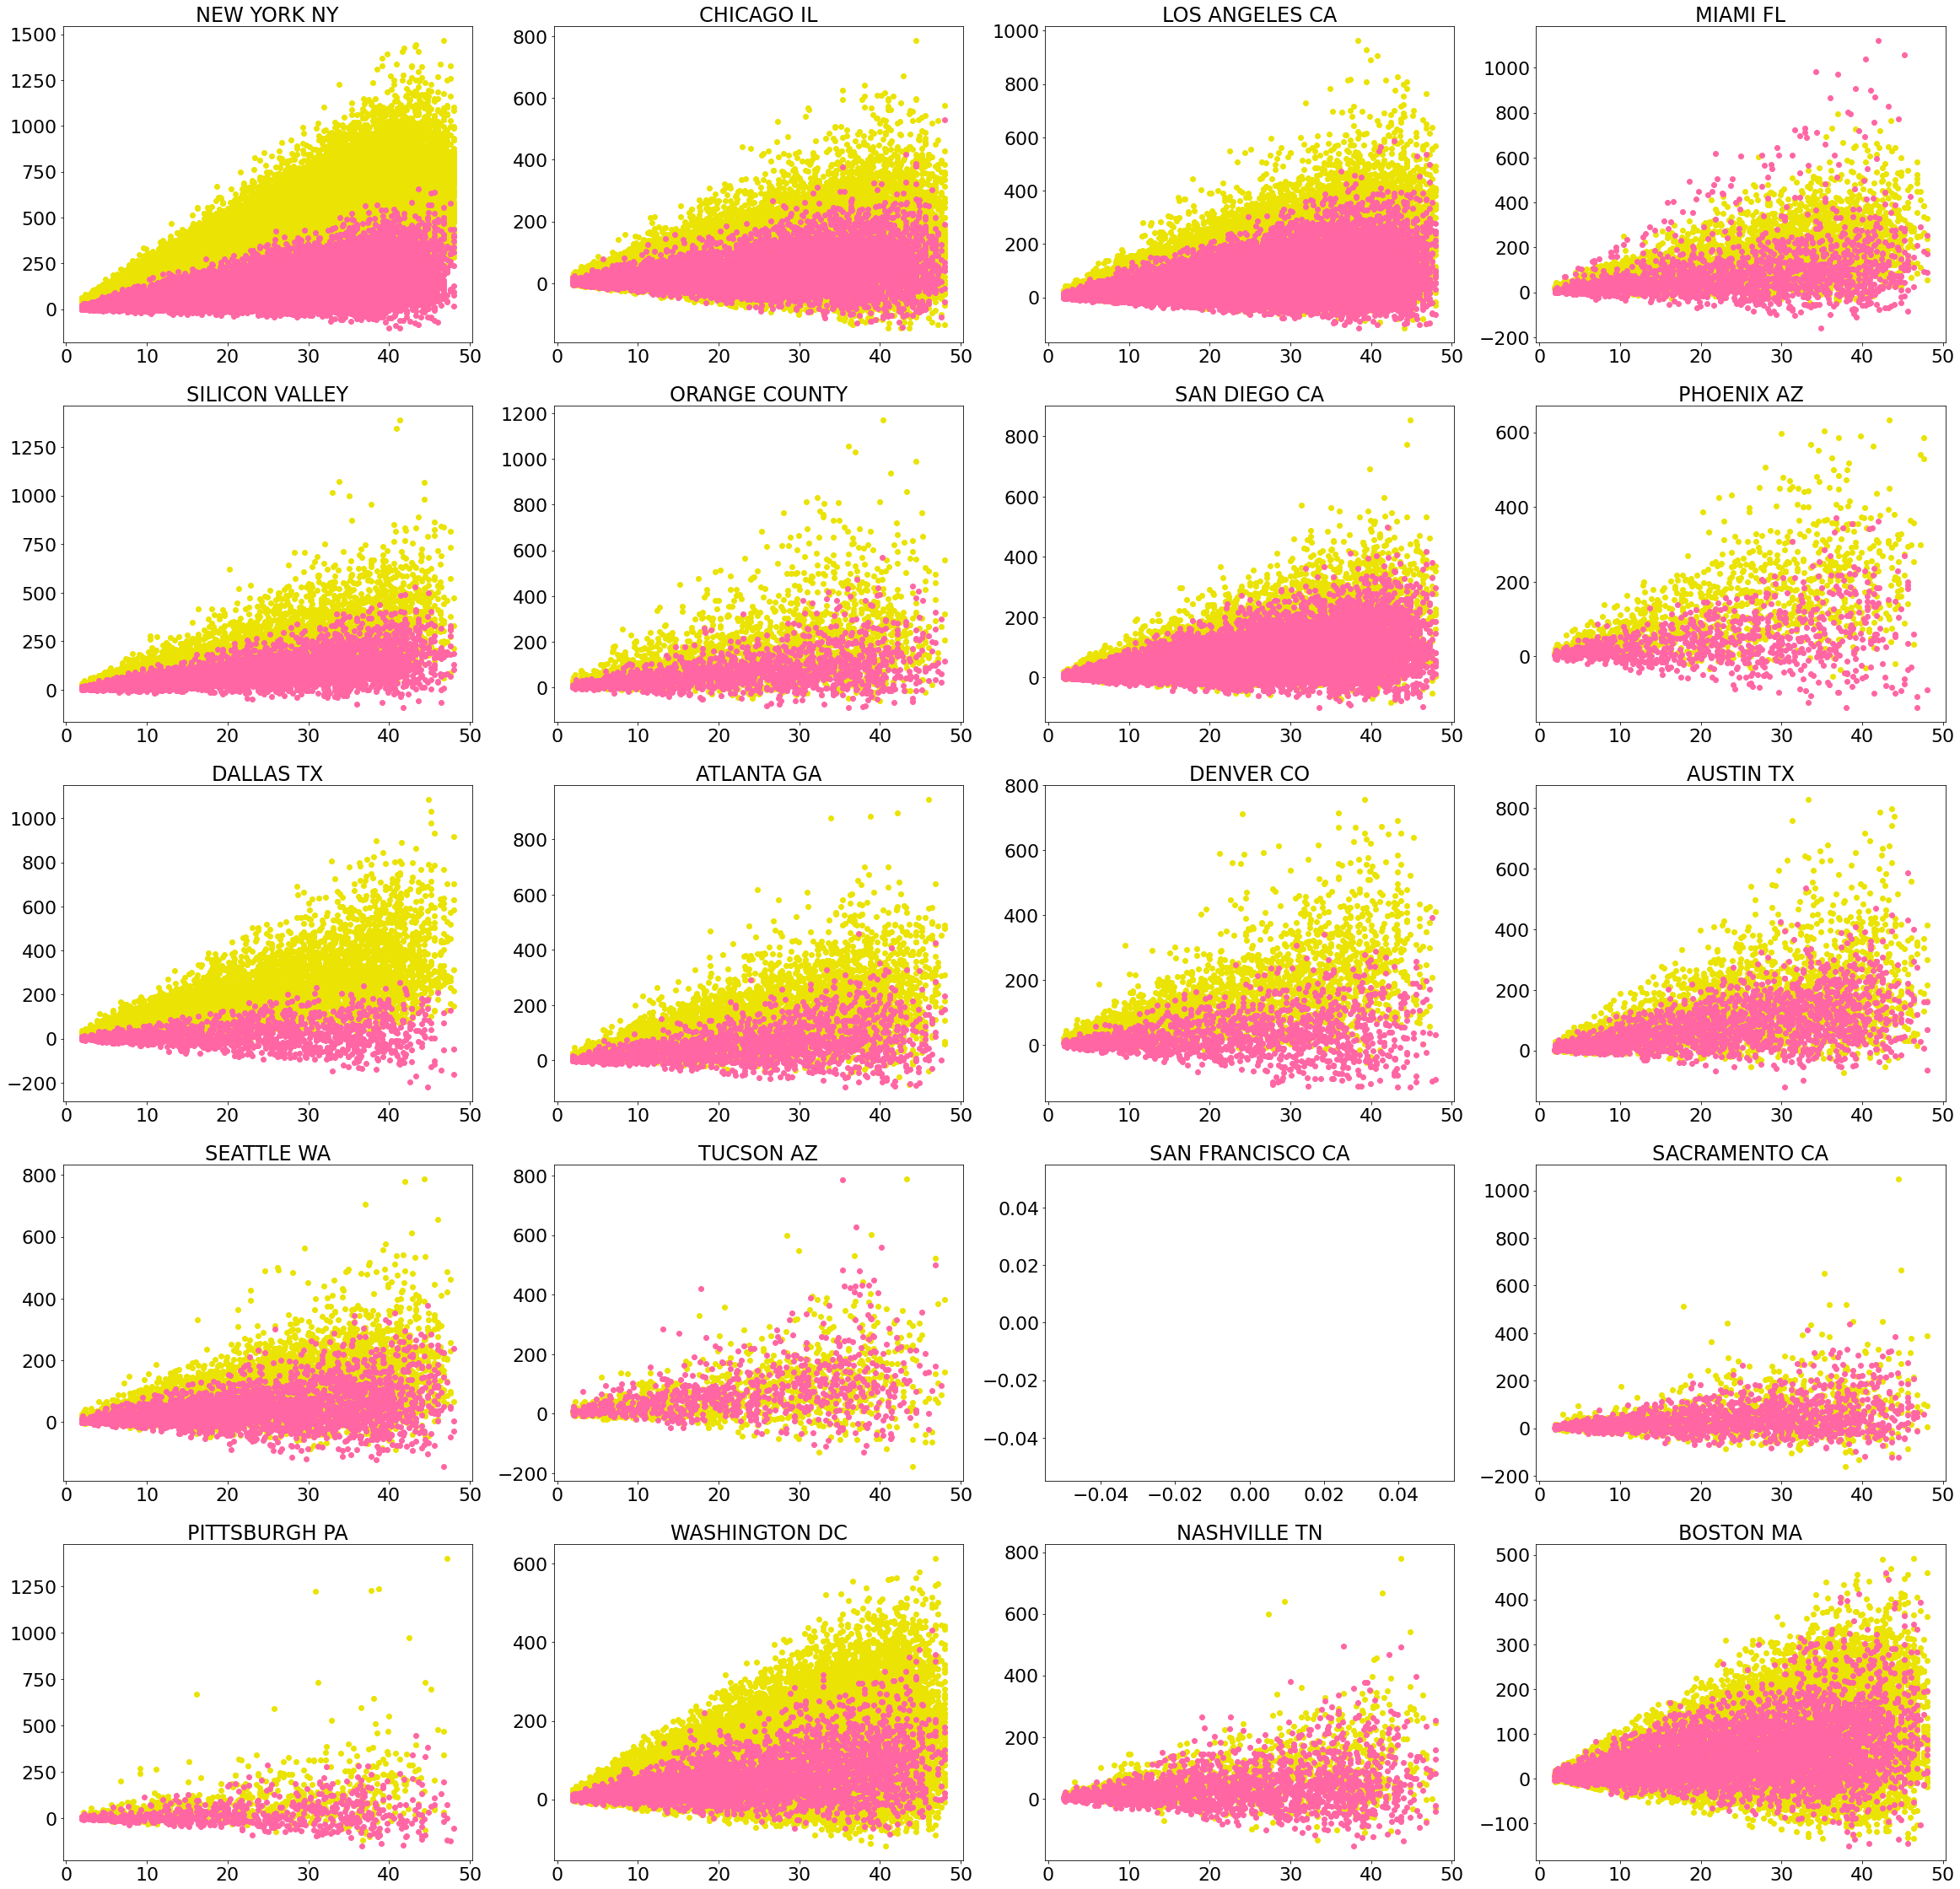

In [40]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(city.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Profit'], color = '#EAE303')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Profit'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show() 

# Comparison of Price per km travelled by city

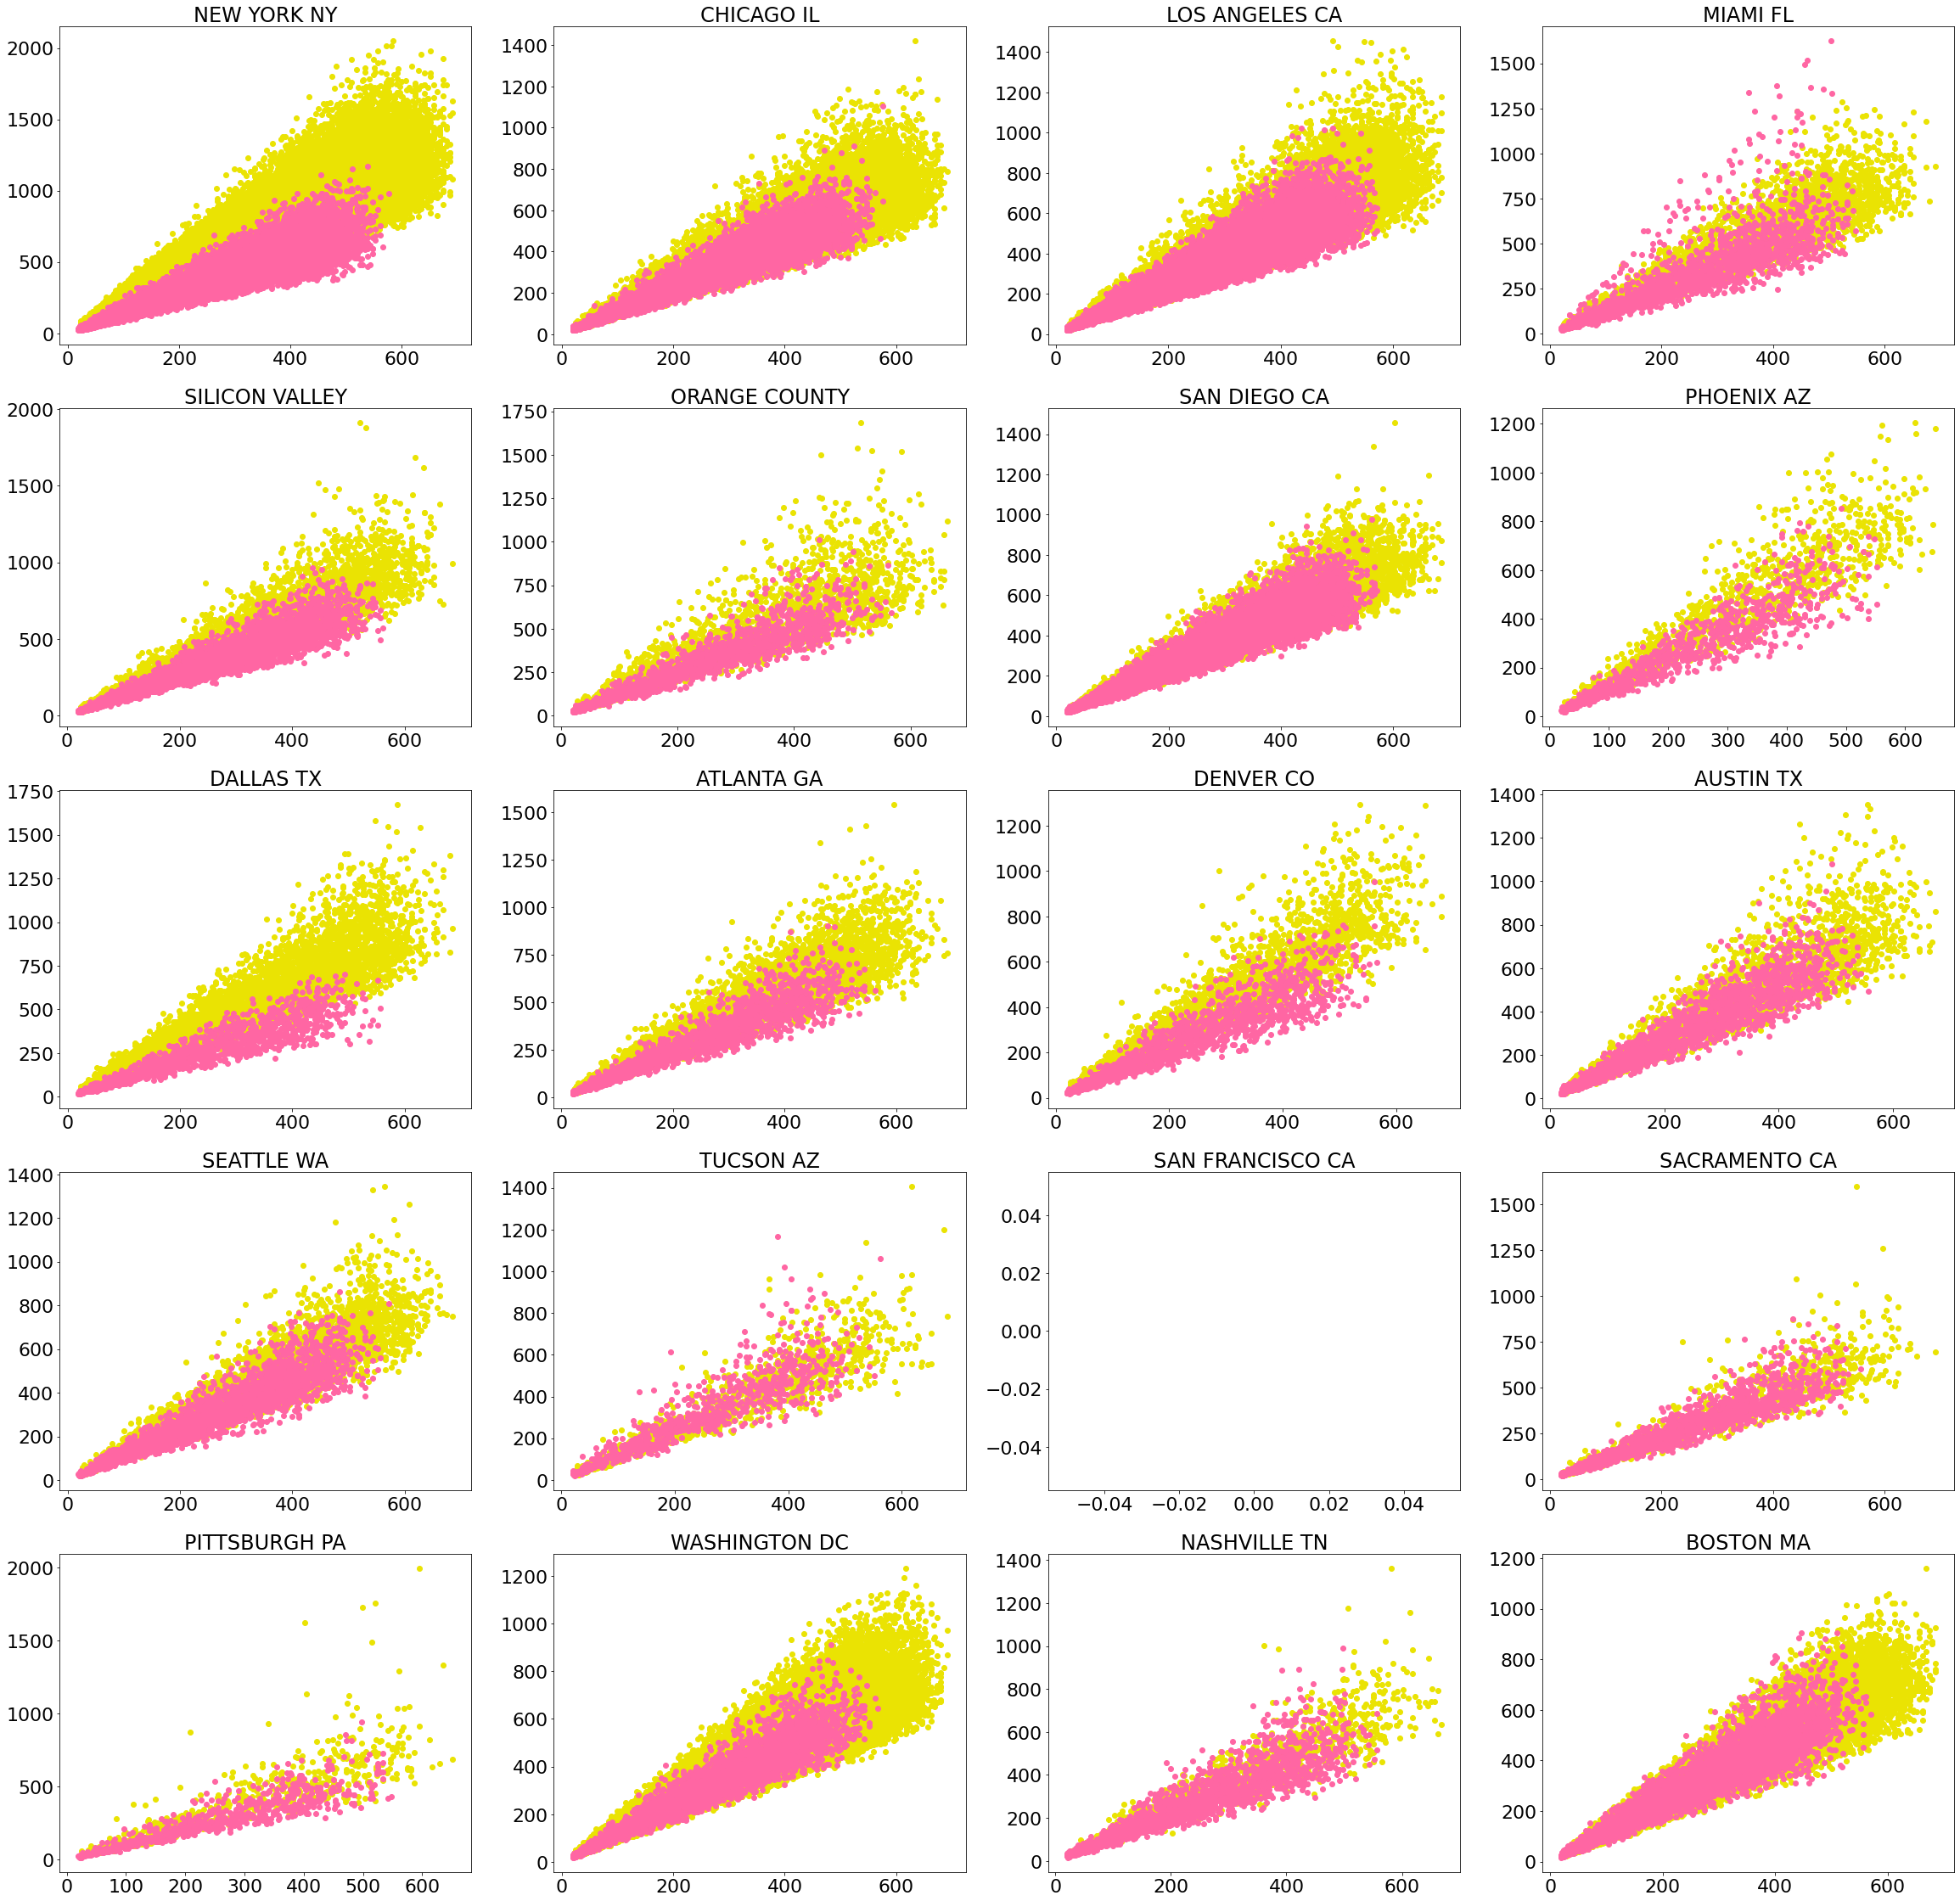

In [22]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(city.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['Cost of Trip'], yellow['Price Charged'], color = '#EAE303')
    axis[i//4, i%4].scatter(pink['Cost of Trip'], pink['Price Charged'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show() 

In [23]:
data['Gain'] = np.where(data['Profit'] >= 0, data['Profit'], None)
data['Loss'] = np.where(data['Profit'] < 0, data['Profit'], None)

In [24]:
g_profit = data.groupby(['Company']).agg({'Profit': 'count'})
g_profit

,Profit
Company,
Pink Cab,84711
Yellow Cab,274681


In [78]:
d_stats = {'Profit': ['count','sum', 'mean'],
           'Cost of Trip': ['sum', 'mean'],
           'KM Travelled': ['sum', 'mean'], 
           'Gain':['count', 'sum', 'mean'], 
           'Loss':['count', 'sum', 'mean']}

col_names = ['Total Trips', 'Total Profit', 'Average Profit', 'Total Cost', 'Average Cost',
             'Total Distance', 'Average Distance', 'Profitable Rides', 'Total Gain',
             'Average Gain', 'Unprofitable Rides', 'Total Loss', 'Average Loss']
g_total = data.groupby(by = [pd.DatetimeIndex(data['Date of Travel']).year, 'Company']).agg(d_stats)
g_total.columns = col_names
g_total['Total Loss'] *= -1
g_total['Average Loss'] *= -1
g_total['Average Margin'] = g_total['Total Profit'] / (g_total['Total Profit']+g_total['Total Cost'])
g_total.to_excel('summary.xlsx')
g_total

Total Trips  Total Profit  Average Profit  \
Date of Travel Company                                                 
2016           Pink Cab          25080  1.713511e+06       68.321819   
               Yellow Cab        82239  1.392700e+07      169.347821   
2017           Pink Cab          30321  2.033655e+06       67.070839   
               Yellow Cab        98189  1.657598e+07      168.817057   
2018           Pink Cab          29310  1.560162e+06       53.229689   
               Yellow Cab        94253  1.351740e+07      143.416122   

                             Total Cost  Average Cost  Total Distance  \
Date of Travel Company                                                  
2016           Pink Cab    6.194968e+06    247.008294       563509.67   
               Yellow Cab  2.455414e+07    298.570481      1859978.21   
2017           Pink Cab    7.544975e+06    248.836603       685823.52   
               Yellow Cab  2.924293e+07    297.822893      2214879.02   
2018           Pink Cab    7.280980e+06    248.412841       661739.92   
               Yellow Cab  2.803644e+07    297.459436      2124560.24   

                           Average Distance  Profitable Rides    Total Gain  \
Date of Travel Company                                                        
2016           Pink Cab           22.468488             21839  1.784712e+06   
               Yellow Cab         22.616742             78353  1.400503e+07   
2017           Pink Cab           22.618763             25959  2.128848e+06   
               Yellow Cab         22.557303             93094  1.668216e+07   
2018           Pink Cab           22.577275             25784  1.620440e+06   
               Yellow Cab         22.541036             89544  1.359228e+07   

                           Average Gain  Unprofitable Rides   Total Loss  \
Date of Travel Company                                                     
2016           Pink Cab       81.721315                3241   71200.5820   
               Yellow Cab    178.742780                3886   78037.6012   
2017           Pink Cab       82.008102                4362   95193.4020   
               Yellow Cab    179.196901                5095  106178.3404   
2018           Pink Cab       62.846743                3526   60278.2250   
               Yellow Cab    151.794451                4709   74882.5772   

                           Average Loss  Average Margin  
Date of Travel Company                                   
2016           Pink Cab       21.968708        0.216668  
               Yellow Cab     20.081730        0.361917  
2017           Pink Cab       21.823338        0.212312  
               Yellow Cab     20.839714        0.361772  
2018           Pink Cab       17.095356        0.176466  
               Yellow Cab     15.902013        0.325298

In [28]:
def create_df(df, col):
    d = {}
    for year in df['Date of Travel'].unique():
        d[year] = [df[df['Date of Travel'] == year][df.Company == 'Yellow Cab'][col].iloc[0], 
                   df[df['Date of Travel'] == year][df.Company == 'Pink Cab'][col].iloc[0]]
    return pd.DataFrame.from_dict(d, orient='index', columns=['Yellow Cab', 'Pink Cab'])

# Number of trips per year

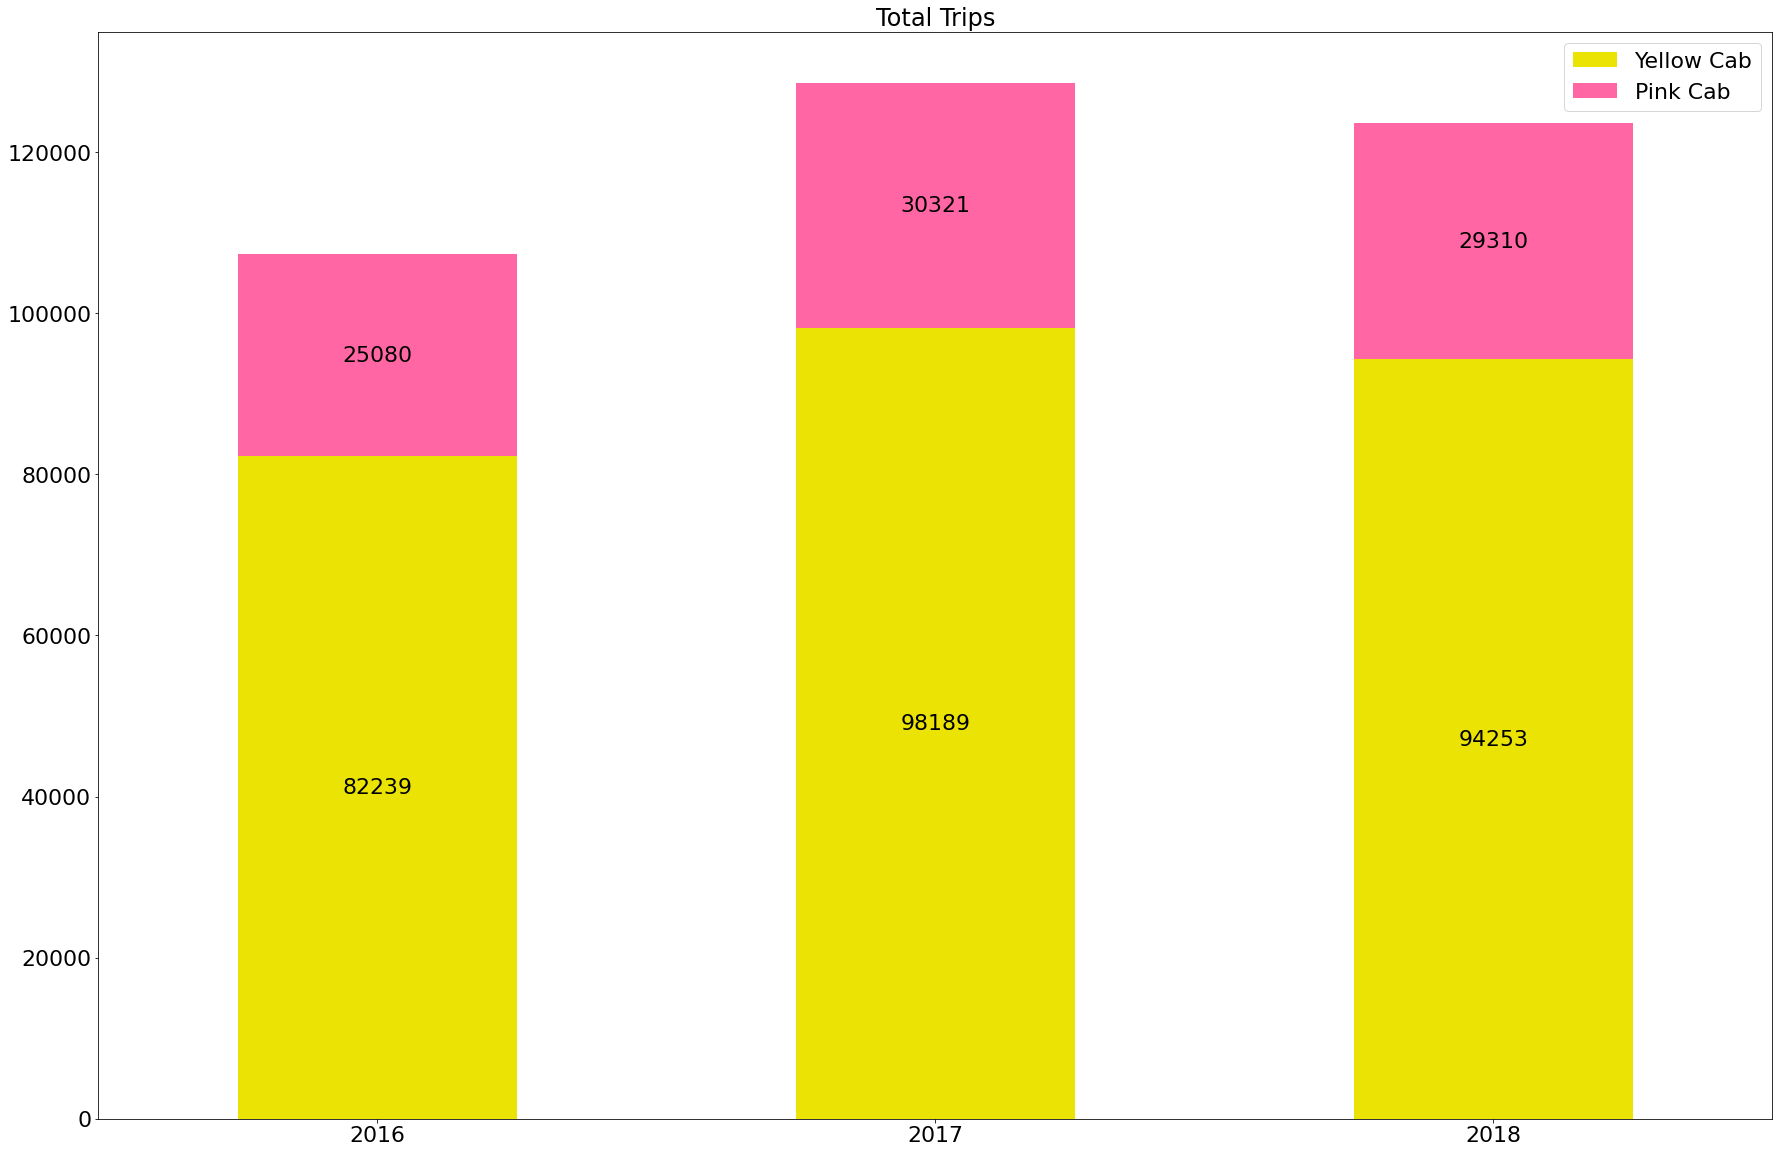

In [59]:
rides = create_df(g_total['Total Trips'].reset_index(), 'Total Trips')
ax = rides.plot.bar(stacked=True, color=['#EAE303', '#ff66a3'], figsize = (30, 20))
labels = [i for i in rides.to_numpy().flatten(order='F')]
plt.rcParams['font.size'] = 22

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center')

ax.set_title('Total Trips', fontsize=24)
plt.legend()
plt.xticks(rotation = 0)
plt.show()

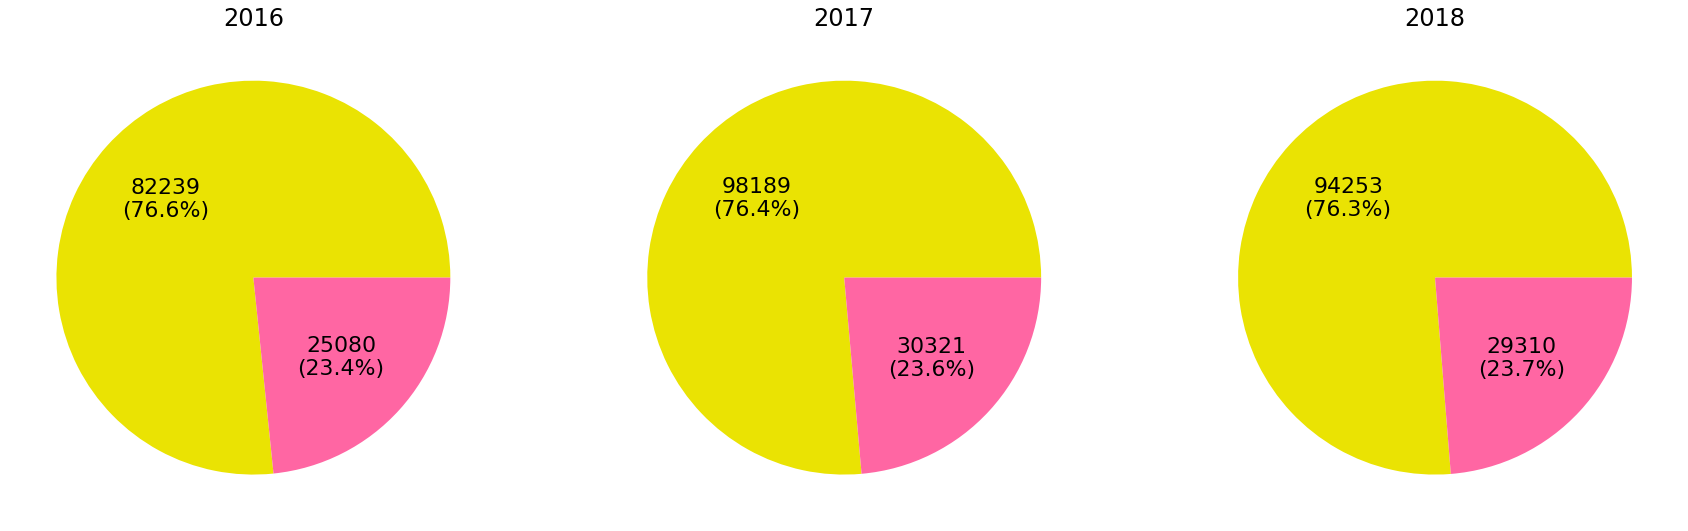

In [46]:
def my_fmt1(x):
    return '{:.0f}\n({:.1f}%)'.format(total*x/100, x)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size'] = 22

for i, el in enumerate(rides.index):
    aux = rides.loc[el]
    total = aux.sum()
    #aux.plot.pie(autopct=my_fmt, colors=['#EAE303', '#ff66a3'], startangle=90)
    axis[i].pie(aux.values, labels = None, autopct=my_fmt1, colors=['#EAE303', '#ff66a3'])
    axis[i].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show()

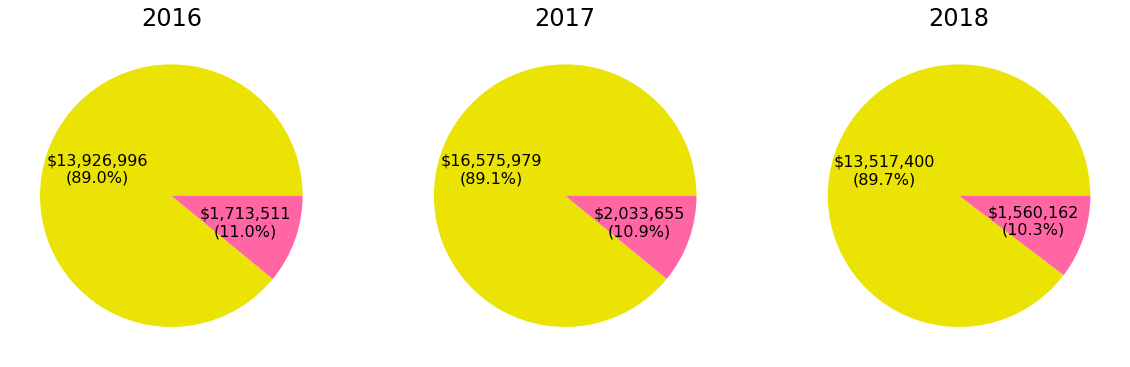

In [48]:
def my_fmt2(x):
    return '${:,.0f}\n({:.1f}%)'.format(total*x/100, x)

yearly_profit = create_df(g_total['Total Profit'].reset_index(), 'Total Profit')

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size'] = 16

for i, el in enumerate(yearly_profit.index):
    aux = yearly_profit.loc[el]
    total = aux.sum()
    #aux.plot.pie(autopct=my_fmt, colors=['#EAE303', '#ff66a3'], startangle=90)
    axis[i].pie(aux.values, labels = None, autopct=my_fmt2, colors=['#EAE303', '#ff66a3'])
    axis[i].set_title(el, fontsize = 24)
# Combine all the operations and display

plt.show()

In [49]:
yearly_cost = create_df(g_total['Total Cost'].reset_index(), 'Total Profit')

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.size'] = 16

for i, el in enumerate(yearly_profit.index):
    aux = yearly_profit.loc[el]
    total = aux.sum()
    #aux.plot.pie(autopct=my_fmt, colors=['#EAE303', '#ff66a3'], startangle=90)
    axis[i].pie(aux.values, labels = None, autopct=my_fmt2, colors=['#EAE303', '#ff66a3'])
    axis[i].set_title(el, fontsize = 24)
# Combine all the operations and display

plt.show()

,Yellow Cab,Pink Cab
2016,82239,25080
2017,98189,30321
2018,94253,29310


In [52]:
print(((rides.loc[2018]/rides.loc[2016])**0.5 - 1)*100) 

Yellow Cab    7.055425
Pink Cab      8.104592
dtype: float64


In [53]:
rides.sum()

Yellow Cab    274681
Pink Cab       84711
dtype: int64

In [79]:
data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Profit,Margin,Gain,Loss
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,57.3150,0.154509,57.315,None
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,23.6660,0.066010,23.666,None
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,27.5680,0.220192,27.568,None
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,25.7980,0.068357,25.798,None
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,16.8440,0.146955,16.844,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,5.8800,0.084922,5.88,None
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,6.9020,0.060677,6.902,None
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,87.4200,0.200014,87.42,None
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,32.1420,0.219865,32.142,None


In [80]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [81]:
total_df = data.merge(customer, on = 'Customer ID')[]
total_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Profit,Margin,Gain,Loss,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,57.3150,0.154509,57.315,None,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,281.2772,0.469813,281.2772,None,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,194.6480,0.245752,194.648,None,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,23.6660,0.066010,23.666,None,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,253.9808,0.352213,253.9808,None,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,47.2656,0.180969,47.2656,None,Female,42,19417
359388,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,105.0980,0.378091,105.098,None,Male,33,18713
359389,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,71.2100,0.234421,71.21,None,Male,38,3960
359390,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,21.8600,0.236529,21.86,None,Male,23,19454


In [122]:
total_df['Yellow'] = np.where(total_df['Company'] == 'Yellow Cab', 1, 0)
total_df['Pink'] = np.where(total_df['Company'] == 'Yellow Cab', 0, 1)
total_df['Card'] = np.where(total_df['Payment_Mode'] == 'Card', 1, 0)
total_df['Cash'] = np.where(total_df['Payment_Mode'] == 'Card', 0, 1)
d_customer = {'Age': ['count', 'mean'],'Yellow': 'sum', 'Pink': 'sum', 'Card': 'sum', 'Cash': 'sum', 
              'KM Travelled': 'mean', 
              'Price Charged': ['sum','mean'], 
              'Profit': ['sum','mean']}
col_names = ['Total Trips', 'Age', 'Yellow Cab Trip', 'Pink Cab Trip', 'Paid with Card', 'Paid with Cash',
             'Average Distance', 'Total Price','Average Price', 'Total Profit', 'Average Profit']
g_customer = total_df.groupby('Customer ID').agg(d_customer)
g_customer.columns = col_names

for el in col_names[5:]:
    g_customer[el] = round(g_customer[el], 2)
#g_customer['Average Margin'] = g_customer['Total Profit'] / g_customer['Total Price']
g_customer

,Total Trips,Age,Yellow Cab Trip,Pink Cab Trip,Paid with Card,Paid with Cash,Average Distance,Total Price,Average Price,Total Profit,Average Profit
Customer ID,,,,,,,,,,,
1,29,36.0,25,4,18,11,24.43,17490.13,603.11,8423.76,290.47
2,40,31.0,36,4,25,15,23.31,23992.86,599.82,11971.31,299.28
3,46,27.0,40,6,30,16,22.55,24828.35,539.75,11660.32,253.49
4,26,33.0,25,1,17,9,24.88,16308.55,627.25,8047.86,309.53
5,31,24.0,23,8,20,11,23.62,19310.97,622.93,9888.41,318.98
...,...,...,...,...,...,...,...,...,...,...,...
59996,4,51.0,4,0,2,2,15.43,805.43,201.36,-24.28,-6.07
59997,10,63.0,8,2,6,4,27.83,4084.56,408.46,565.85,56.58
59998,9,23.0,6,3,5,4,25.97,3664.30,407.14,711.51,79.06


# Combination Matrix - number of clients

- Preference of company
- Preference of payment mode

In [117]:
a1 = g_customer['Yellow Cab Trip'] > g_customer['Pink Cab Trip']
a2 = g_customer['Yellow Cab Trip'] == g_customer['Pink Cab Trip']
a3 = g_customer['Yellow Cab Trip'] < g_customer['Pink Cab Trip']
b1 = g_customer['Paid with Card'] > g_customer['Paid with Cash']
b2 = g_customer['Paid with Card'] == g_customer['Paid with Cash']
b3 = g_customer['Paid with Card'] < g_customer['Paid with Cash']
l = ((a1, a2, a3), (b1, b2, b3))
idxs = ['Yellow', 'Indifferent/Others', 'Pink']
cols = ['More Card', 'Indifferent', 'More Cash']

d_matrix = {}
for i in range(0,3):
    d_matrix[idxs[i]] = []
    for j in range(0,3):
        aux = d_matrix.get(idxs[i])
        aux.append(g_customer[l[0][i]][l[1][j]].shape[0])
        d_matrix[idxs[i]] = aux
        
matrix = pd.DataFrame.from_dict(d_matrix, orient='index', columns=cols)
matrix 

,More Card,Indifferent,More Cash
Yellow,20311,3265,7706
Indifferent/Others,2075,2080,826
Pink,5971,831,3083


# Combination Matrix - Average Profit Margin (%)
- Curious to see that card preference leads to higher profit margin than cash, meaning that card payers are willing to pay more for the rides

In [146]:
d_matrix = {}
for i in range(0,3):
    d_matrix[idxs[i]] = []
    for j in range(0,3):
        aux = d_matrix.get(idxs[i])
        aux.append(round(g_customer[l[0][i]][l[1][j]]['Total Profit'].sum() / g_customer[l[0][i]][l[1][j]]['Total Price'].sum() * 100, 2))
        d_matrix[idxs[i]] = aux
        
matrix = pd.DataFrame.from_dict(d_matrix, orient='index', columns=cols)
matrix 

,More Card,Indifferent,More Cash
Yellow,34.65,29.31,30.75
Indifferent/Others,24.54,24.80,25.09
Pink,22.08,20.91,21.59


# Combination Matrix - Average User Age

In [133]:
d_matrix = {}
for i in range(0,3):
    d_matrix[idxs[i]] = []
    for j in range(0,3):
        aux = d_matrix.get(idxs[i])
        aux.append(round(g_customer[l[0][i]][l[1][j]]['Age'].mean()))
        d_matrix[idxs[i]] = aux
        
matrix = pd.DataFrame.from_dict(d_matrix, orient='index', columns=cols)
matrix 

,More Card,Indifferent,More Cash
Yellow,35,35,35
Indifferent/Others,35,35,35
Pink,36,35,35


In [158]:
def create_df2(df, col):
    d = {}
    for date in df.index():
        d[date] = [df[df['Date of Travel'] == date][df.Company == 'Yellow Cab'][col].iloc[0], 
                   df[df['Date of Travel'] == date][df.Company == 'Pink Cab'][col].iloc[0]]
    return pd.DataFrame.from_dict(d, orient='index', columns=['Yellow Cab', 'Pink Cab'])

In [187]:
d_stats = {'Profit': ['count','sum', 'mean'],
           'Cost of Trip': ['sum', 'mean'],
           'KM Travelled': ['sum', 'mean'], 
           'Gain':['count', 'sum', 'mean'], 
           'Loss':['count', 'sum', 'mean'],
           'Price Charged': 'sum'}

col_names = ['Total Trips', 'Total Profit', 'Average Profit', 'Total Cost', 'Average Cost',
             'Total Distance', 'Average Distance', 'Profitable Rides', 'Total Gain',
             'Average Gain', 'Unprofitable Rides', 'Total Loss', 'Average Loss', 'Total Revenue']
g_time = data.groupby([data['Date of Travel'], 'Company']).agg(d_stats)
g_time.columns = col_names
g_time['Margin'] = g_time['Total Profit'] / g_time['Total Revenue']
g_time

Total Trips  Total Profit  Average Profit  \
Date of Travel Company                                                 
2016-01-02     Pink Cab             41     4809.4210      117.302951   
               Yellow Cab          140    45295.6412      323.540294   
2016-01-03     Pink Cab             52    10620.5820      204.241962   
               Yellow Cab          126    38449.5288      305.154990   
2016-01-04     Pink Cab              4      428.5910      107.147750   
...                                ...           ...             ...   
2018-12-29     Yellow Cab          630    98814.0764      156.847740   
2018-12-30     Pink Cab             56     4019.0560       71.768857   
               Yellow Cab          201    19574.0716       97.383441   
2018-12-31     Pink Cab             58     4444.1560       76.623379   
               Yellow Cab          198    17787.6068       89.836398   

                            Total Cost  Average Cost  Total Distance  \
Date of Travel Company                                                 
2016-01-02     Pink Cab      9049.1590    220.711195          814.49   
               Yellow Cab   43161.7488    308.298206         3279.47   
2016-01-03     Pink Cab     14754.7480    283.745154         1342.21   
               Yellow Cab   37521.7212    297.791438         2827.62   
2016-01-04     Pink Cab       837.4790    209.369750           79.30   
...                                ...           ...             ...   
2018-12-29     Yellow Cab  190737.5136    302.757958        14402.06   
2018-12-30     Pink Cab     13903.7640    248.281500         1263.91   
               Yellow Cab   59852.6184    297.774221         4513.79   
2018-12-31     Pink Cab     15348.5840    264.630759         1380.66   
               Yellow Cab   59287.5732    299.432188         4487.53   

                           Average Distance  Profitable Rides  Total Gain  \
Date of Travel Company                                                      
2016-01-02     Pink Cab           19.865610                37   4936.6060   
               Yellow Cab         23.424786               140  45295.6412   
2016-01-03     Pink Cab           25.811731                52  10620.5820   
               Yellow Cab         22.441429               126  38449.5288   
2016-01-04     Pink Cab           19.825000                 4    428.5910   
...                                     ...               ...         ...   
2018-12-29     Yellow Cab         22.860413               615  99096.1008   
2018-12-30     Pink Cab           22.569821                56   4019.0560   
               Yellow Cab         22.456667               186  19908.7696   
2018-12-31     Pink Cab           23.804483                58   4444.1560   
               Yellow Cab         22.664293               177  18216.2116   

                           Average Gain  Unprofitable Rides  Total Loss  \
Date of Travel Company                                                    
2016-01-02     Pink Cab      133.421784                   4   -127.1850   
               Yellow Cab    323.540294                   0      0.0000   
2016-01-03     Pink Cab      204.241962                   0      0.0000   
               Yellow Cab    305.154990                   0      0.0000   
2016-01-04     Pink Cab      107.147750                   0      0.0000   
...                                 ...                 ...         ...   
2018-12-29     Yellow Cab    161.131871                  15   -282.0244   
2018-12-30     Pink Cab       71.768857                   0      0.0000   
               Yellow Cab    107.036396                  15   -334.6980   
2018-12-31     Pink Cab       76.623379                   0      0.0000   
               Yellow Cab    102.916450                  21   -428.6048   

                           Average Loss  Total Revenue    Margin  
Date of Travel Company                                            
2016-01-02     Pink Cab      -31.796250  

In [189]:
trips_time = create_df(g_time.reset_index(), 'Total Trips')
trips_time['Yellow Cab'] = trips_time['Yellow Cab'].rolling(window=15).mean()
trips_time['Pink Cab'] = trips_time['Pink Cab'].rolling(window=15).mean()
trips_time.dropna(inplace = True)

profit_time = create_df(g_time.reset_index(), 'Average Profit')
profit_time['Yellow Cab'] = profit_time['Yellow Cab'].rolling(window=15).mean()
profit_time['Pink Cab'] = profit_time['Pink Cab'].rolling(window=15).mean()
profit_time.dropna(inplace = True)

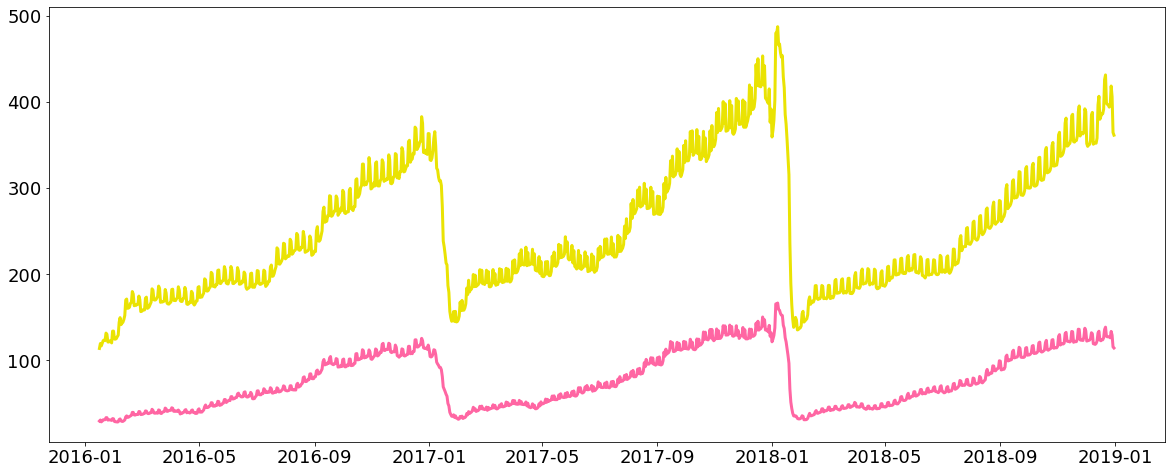

In [186]:
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.size'] = 18
plt.plot(trips_time['Yellow Cab'], color = '#EAE303', linewidth = 3)
plt.plot(trips_time['Pink Cab'], color =  '#ff66a3', linewidth = 3)
plt.show()

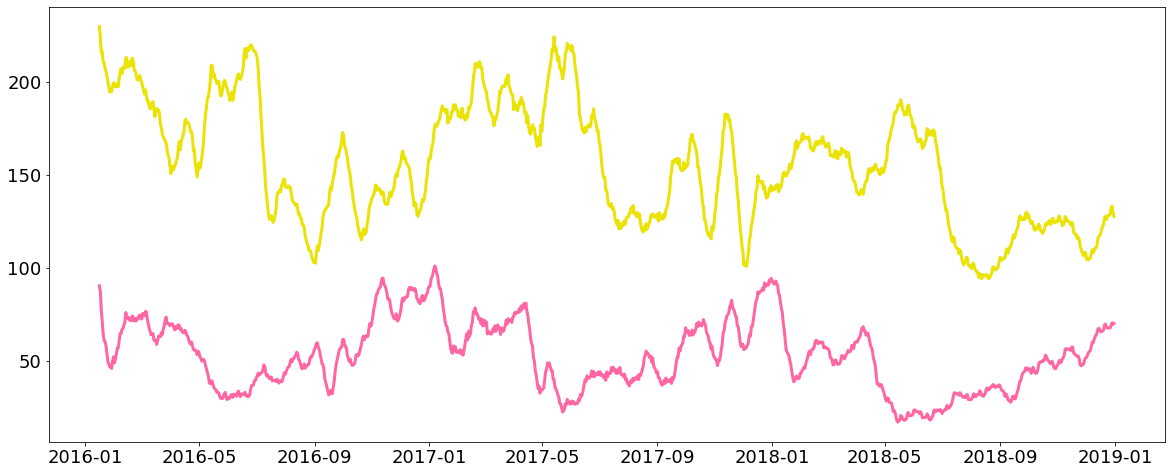

In [190]:
plt.plot(profit_time['Yellow Cab'], color = '#EAE303', linewidth = 3)
plt.plot(profit_time['Pink Cab'], color =  '#ff66a3', linewidth = 3)
plt.show()

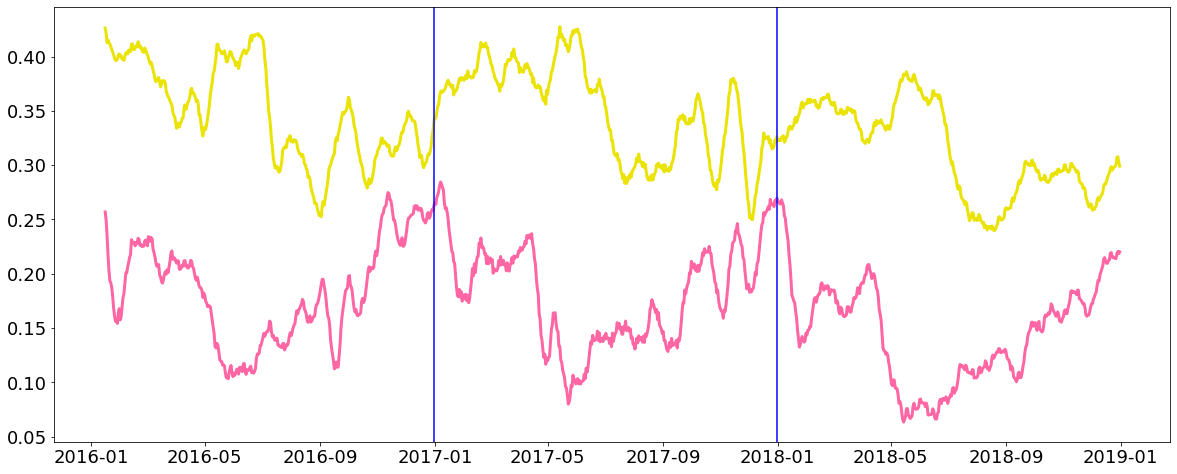

In [204]:
plt.plot(margin_time['Yellow Cab'], color = '#EAE303', linewidth = 3)
plt.plot(margin_time['Pink Cab'], color =  '#ff66a3', linewidth = 3)
#for el in holidays.Date.unique():
plt.axvline(x = dt.date(2016,12,31), color = 'b')
plt.axvline(x = dt.date(2017,12,31), color = 'b')
plt.show()

In [196]:
holidays

,Date,Holiday,WeekDay
12,2016-07-04,4th of July,Monday
13,2017-07-04,4th of July,Tuesday
14,2018-07-04,4th of July,Wednesday
30,2016-12-25,Christmas Day,Sunday
31,2017-12-25,Christmas Day,Monday
32,2018-12-25,Christmas Day,Tuesday
48,2016-12-24,Christmas Eve,Saturday
49,2017-12-24,Christmas Eve,Sunday
50,2018-12-24,Christmas Eve,Monday
56,2018-10-08,Columbus Day,Monday


In [198]:
holidays.iloc[0].Date

Timestamp('2016-07-04 00:00:00')

# Holiday seasonality

In [304]:
d_stats = {'Profit': ['count','sum', 'mean'],
           'Cost of Trip': ['sum', 'mean'],
           'KM Travelled': ['sum', 'mean'], 
           'Gain':['count', 'sum', 'mean'], 
           'Loss':['count', 'sum', 'mean'],
           'Price Charged': 'sum'}

col_names = ['Total Trips', 'Total Profit', 'Average Profit', 'Total Cost', 'Average Cost',
             'Total Distance', 'Average Distance', 'Profitable Rides', 'Total Gain',
             'Average Gain', 'Unprofitable Rides', 'Total Loss', 'Average Loss', 'Total Revenue']
g_year = data.groupby([pd.DatetimeIndex(data['Date of Travel']).month, pd.DatetimeIndex(data['Date of Travel']).day, 'Company']).agg(d_stats)
g_year.index.set_names(['Month', 'Day', 'Company'], inplace = True)
g_year.columns = col_names
g_year['Margin'] = g_year['Total Profit'] / g_year['Total Revenue']
g_year['Average Trips'] = g_year['Total Trips'] / 3
g_year

Total Trips  Total Profit  Average Profit   Total Cost  \
Month Day Company                                                              
1     1   Pink Cab            294    34188.5570      116.287609   73497.9930   
          Yellow Cab          966   182071.2656      188.479571  286925.8344   
      2   Pink Cab            244    20476.5600       83.920328   59951.3300   
          Yellow Cab          675   121629.0392      180.191169  208710.9708   
      3   Pink Cab            266    28910.1830      108.684898   69799.3070   
...                           ...           ...             ...          ...   
12    29  Yellow Cab         1507   255218.5324      169.355363  458179.7976   
      30  Pink Cab            203    17856.8400       87.964729   52762.0300   
          Yellow Cab          681    87616.5984      128.658735  199281.8016   
      31  Pink Cab            411    44933.5680      109.327416  107234.1920   
          Yellow Cab         1375   219227.9456      159.438506  408555.9444   

                      Average Cost  Total Distance  Average Distance  \
Month Day Company                                                      
1     1   Pink Cab      249.993173         6716.99         22.846905   
          Yellow Cab    297.024673        21802.67         22.570052   
      2   Pink Cab      245.702172         5435.10         22.275000   
          Yellow Cab    309.201438        15803.70         23.412889   
      3   Pink Cab      262.403410         6355.54         23.893008   
...                            ...             ...               ...   
12    29  Yellow Cab    304.034371        34596.50         22.957200   
      30  Pink Cab      259.911478         4777.53         23.534631   
          Yellow Cab    292.631133        15067.39         22.125389   
      31  Pink Cab      260.910443         9704.29         23.611411   
          Yellow Cab    297.131596        30921.82         22.488596   

                      Profitable Rides   Total Gain  Average Gain  \
Month Day Company                                                   
1     1   Pink Cab                 286   34371.9110    120.181507   
          Yellow Cab               945  182546.0628    193.170437   
      2   Pink Cab                 231   20709.8210     89.652905   
          Yellow Cab               629  122673.0408    195.028682   
      3   Pink Cab                 258   29023.7710    112.495236   
...                                ...          ...           ...   
12    29  Yellow Cab              1469  255823.0184    174.147732   
      30  Pink Cab                 192   18041.2490     93.964839   
          Yellow Cab               654   88111.6356    134.727272   
      31  Pink Cab                 404   45095.4640    111.622436   
          Yellow Cab              1328  219898.5008    165.586220   

                      Unprofitable Rides  Total Loss  Average Loss  \
Month Day Company                                                    
1     1   Pink Cab                     8   -183.3540    -22.919250   
          Yellow Cab                  21   -474.7972    -22.609390   
      2   Pink Cab                    13   -233.2610    -17.943154   
          Yellow Cab                  46  -1044.0016    -22.695687   
      3   Pink Cab                     8   -113.5880    -14.198500   
...                                  ...         ...           ...   
12    29  Yellow Cab                  38   -604.4860    -15.907526   
      30  Pink Cab                    11   -184.4090    -16.764455   
          Yellow Cab                  27   -495.0372    -18.334711   
      31  Pink Cab                     7   -161.8960    -23.128000   
          Yellow Cab                  47   -670.5552    -14.267132   

                      Total Revenue    Margin  Average Trips  
Month Day Company                                             
1     1   Pink Cab        107686.55  0.317482      98.000000  
          Yellow Cab      468997.10  0.388214 

In [219]:
g_year.index.set_names(['Month', 'Day', 'Company'], inplace = True)
g_year

Total Trips  Total Profit  Average Profit   Total Cost  \
Month Day Company                                                              
1     1   Pink Cab            294    34188.5570      116.287609   73497.9930   
          Yellow Cab          966   182071.2656      188.479571  286925.8344   
      2   Pink Cab            244    20476.5600       83.920328   59951.3300   
          Yellow Cab          675   121629.0392      180.191169  208710.9708   
      3   Pink Cab            266    28910.1830      108.684898   69799.3070   
...                           ...           ...             ...          ...   
12    29  Yellow Cab         1507   255218.5324      169.355363  458179.7976   
      30  Pink Cab            203    17856.8400       87.964729   52762.0300   
          Yellow Cab          681    87616.5984      128.658735  199281.8016   
      31  Pink Cab            411    44933.5680      109.327416  107234.1920   
          Yellow Cab         1375   219227.9456      159.438506  408555.9444   

                      Average Cost  Total Distance  Average Distance  \
Month Day Company                                                      
1     1   Pink Cab      249.993173         6716.99         22.846905   
          Yellow Cab    297.024673        21802.67         22.570052   
      2   Pink Cab      245.702172         5435.10         22.275000   
          Yellow Cab    309.201438        15803.70         23.412889   
      3   Pink Cab      262.403410         6355.54         23.893008   
...                            ...             ...               ...   
12    29  Yellow Cab    304.034371        34596.50         22.957200   
      30  Pink Cab      259.911478         4777.53         23.534631   
          Yellow Cab    292.631133        15067.39         22.125389   
      31  Pink Cab      260.910443         9704.29         23.611411   
          Yellow Cab    297.131596        30921.82         22.488596   

                      Profitable Rides   Total Gain  Average Gain  \
Month Day Company                                                   
1     1   Pink Cab                 286   34371.9110    120.181507   
          Yellow Cab               945  182546.0628    193.170437   
      2   Pink Cab                 231   20709.8210     89.652905   
          Yellow Cab               629  122673.0408    195.028682   
      3   Pink Cab                 258   29023.7710    112.495236   
...                                ...          ...           ...   
12    29  Yellow Cab              1469  255823.0184    174.147732   
      30  Pink Cab                 192   18041.2490     93.964839   
          Yellow Cab               654   88111.6356    134.727272   
      31  Pink Cab                 404   45095.4640    111.622436   
          Yellow Cab              1328  219898.5008    165.586220   

                      Unprofitable Rides  Total Loss  Average Loss  \
Month Day Company                                                    
1     1   Pink Cab                     8   -183.3540    -22.919250   
          Yellow Cab                  21   -474.7972    -22.609390   
      2   Pink Cab                    13   -233.2610    -17.943154   
          Yellow Cab                  46  -1044.0016    -22.695687   
      3   Pink Cab                     8   -113.5880    -14.198500   
...                                  ...         ...           ...   
12    29  Yellow Cab                  38   -604.4860    -15.907526   
      30  Pink Cab                    11   -184.4090    -16.764455   
          Yellow Cab                  27   -495.0372    -18.334711   
      31  Pink Cab                     7   -161.8960    -23.128000   
          Yellow Cab                  47   -670.5552    -14.267132   

                      Total Revenue    Margin  
Month Day Company                              
1     1   Pink Cab        107686.55  0.317482  
          Yellow Cab      468997.10  0.388214  
      2   Pink Cab         80427.89  0.2545

In [261]:
def create_df2(df, col):
    d = {}
    cont = 0
    for month in df.Month.unique():
        m = df[df.Month == month]
        for day in m.Day.unique():
            d[cont] = [month, day, 
                    m[m.Day == day][m.Company == 'Yellow Cab'][col].iloc[0], 
                    m[m.Day == day][m.Company == 'Pink Cab'][col].iloc[0]]
            cont += 1
    result = pd.DataFrame.from_dict(d, orient = 'index', columns = ['Month', 'Day', 'Yellow Cab', 'Pink Cab']).set_index(['Month', 'Day'])
    result['index'] = ["%02d-%02d" % item for item in result.index.tolist()]
    return result.set_index('index')

In [262]:
create_df2(g_year.reset_index(), 'Average Profit')

,Yellow Cab,Pink Cab
index,,
01-01,188.479571,116.287609
01-02,180.191169,83.920328
01-03,167.496017,108.684898
01-04,146.076245,71.079990
01-05,169.749408,90.546839
...,...,...
12-27,137.975564,84.223936
12-28,154.779959,87.942441
12-29,169.355363,109.641658


In [329]:
profit_year = create_df2(g_year.reset_index(), 'Average Profit')
profit_year['Yellow Cab'] = profit_year['Yellow Cab'].rolling(window=15).mean()
profit_year['Pink Cab'] = profit_year['Pink Cab'].rolling(window=15).mean()
profit_year.dropna(inplace = True)

trips_year = create_df2(g_year.reset_index(), 'Average Trips')
trips_year['Yellow Cab'] = trips_year['Yellow Cab'].rolling(window=15).mean()
trips_year['Pink Cab'] = trips_year['Pink Cab'].rolling(window=15).mean()
trips_year.dropna(inplace = True)


margin_year = create_df2(g_year.reset_index(), 'Margin')
margin_year['Yellow Cab'] = margin_year['Yellow Cab'].rolling(window=15).mean()
margin_year['Pink Cab'] = margin_year['Pink Cab'].rolling(window=15).mean()
margin_year.dropna(inplace = True)

aux = holidays[pd.DatetimeIndex(holidays.Date).year == 2017]
aux['Month'] = pd.DatetimeIndex(aux.Date).month
aux['Day'] = pd.DatetimeIndex(aux.Date).day
aux.set_index(['Month', 'Day'], inplace = True)
aux['index'] = ["%02d-%02d" % item for item in aux.index.tolist()]
aux = aux.set_index('index')['Holiday']

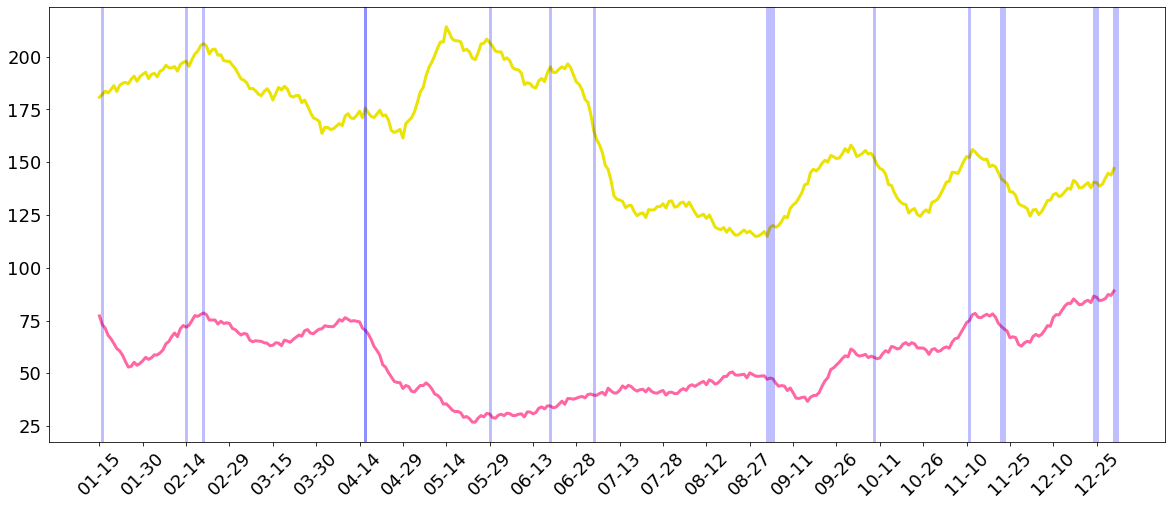

In [330]:
fig, ax = plt.subplots()

plt.plot(profit_year['Yellow Cab'], color = '#EAE303', linewidth = 3)
plt.plot(profit_year['Pink Cab'], color =  '#ff66a3', linewidth = 3)
plt.xticks([el for i,el in enumerate(trips_year.index) if i%15 == 0], rotation = 45)
for el in aux.index:
    plt.axvline(x = el, linewidth = 3, color = 'b', alpha = 0.25)
plt.show()

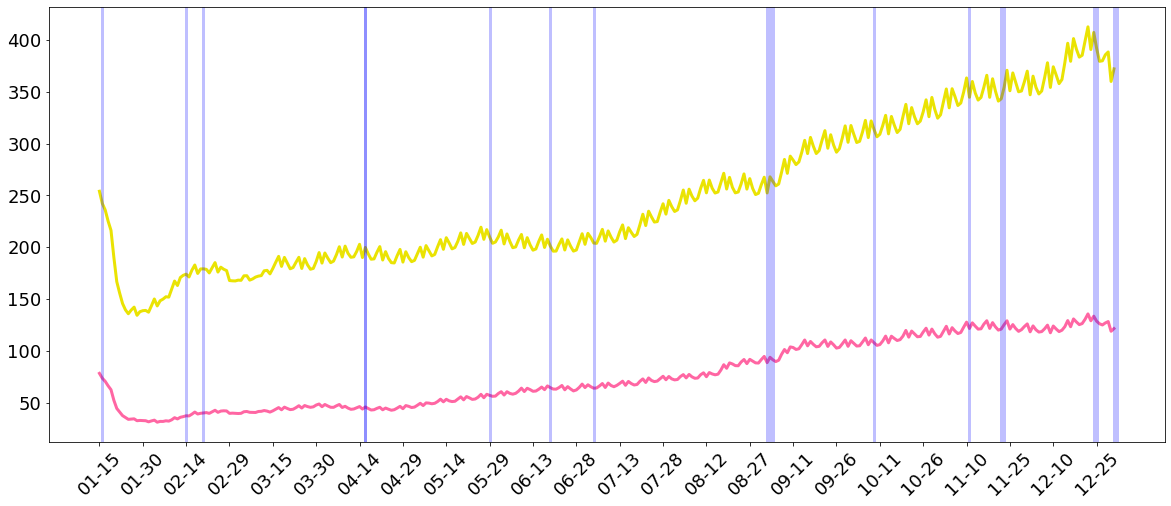

In [331]:
fig, ax = plt.subplots()

#plt.locator_params(axis='x', nbins=12)
plt.plot(trips_year['Yellow Cab'], color = '#EAE303', linewidth = 3)
plt.plot(trips_year['Pink Cab'], color =  '#ff66a3', linewidth = 3)
plt.xticks([el for i,el in enumerate(trips_year.index) if i%15 == 0], rotation = 45)
for el in aux.index:
    plt.axvline(x = el, linewidth = 3, color = 'b', alpha = 0.25)
plt.show()

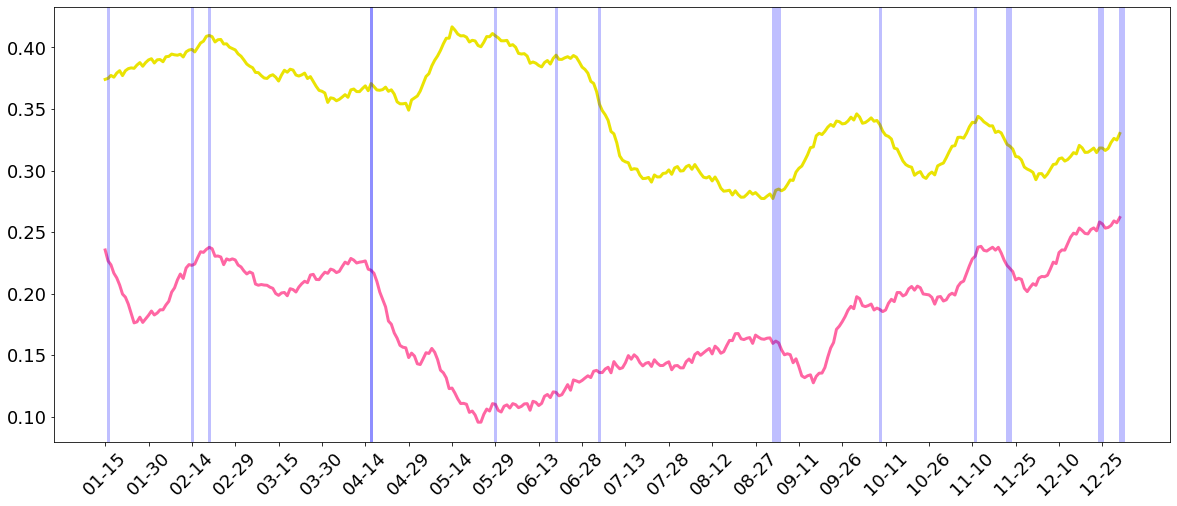

In [332]:
fig, ax = plt.subplots()

#plt.locator_params(axis='x', nbins=12)
plt.plot(margin_year['Yellow Cab'], color = '#EAE303', linewidth = 3)
plt.plot(margin_year['Pink Cab'], color =  '#ff66a3', linewidth = 3)
plt.xticks([el for i,el in enumerate(margin_year.index) if i%15 == 0], rotation = 45)
for el in aux.index:
    plt.axvline(x = el, linewidth = 3, color = 'b', alpha = 0.25)
plt.show()

In [338]:
g_customer.columns

Index(['Total Trips', 'Age', 'Yellow Cab Trip', 'Pink Cab Trip',
       'Paid with Card', 'Paid with Cash', 'Average Distance', 'Total Price',
       'Average Price', 'Total Profit', 'Average Profit'],
      dtype='object')

In [349]:
cardcash = g_customer[['Total Trips', 'Age', 'Paid with Card', 'Paid with Cash', 'Average Profit', 'Total Price','Average Price', 'Total Profit']]
cardcash = cardcash[cardcash['Total Trips'] > 5]
cardcash['Margin'] = cardcash['Total Profit'] / cardcash['Total Price']
cardcash['%'] = cardcash['Paid with Card'] / (cardcash['Paid with Card'] + cardcash['Paid with Cash'])
cardcash

,Total Trips,Age,Paid with Card,Paid with Cash,Average Profit,Total Price,Average Price,Total Profit,Margin,%
Customer ID,,,,,,,,,,
1,29,36.0,18,11,290.47,17490.13,603.11,8423.76,0.481629,0.620690
2,40,31.0,25,15,299.28,23992.86,599.82,11971.31,0.498953,0.625000
3,46,27.0,30,16,253.49,24828.35,539.75,11660.32,0.469637,0.652174
4,26,33.0,17,9,309.53,16308.55,627.25,8047.86,0.493475,0.653846
5,31,24.0,20,11,318.98,19310.97,622.93,9888.41,0.512062,0.645161
...,...,...,...,...,...,...,...,...,...,...
59995,13,24.0,6,7,42.36,4030.78,310.06,550.69,0.136621,0.461538
59997,10,63.0,6,4,56.58,4084.56,408.46,565.85,0.138534,0.600000
59998,9,23.0,5,4,79.06,3664.30,407.14,711.51,0.194174,0.555556


In [381]:
n = cardcash.shape[0]
X = cardcash['%'].to_numpy().reshape(n, 1)
y = cardcash['Margin'].to_numpy().reshape(n, 1)
print(X)
print(y)

[[0.62068966]
 [0.625     ]
 [0.65217391]
 ...
 [0.55555556]
 [0.5       ]
 [0.5       ]]
[[0.48162935]
 [0.49895302]
 [0.46963733]
 ...
 [0.19417351]
 [0.14784946]
 [0.20089587]]


In [382]:
reg = LinearRegression().fit(X, y)

In [383]:
reg.score(X, y)

2.283914330991621e-07

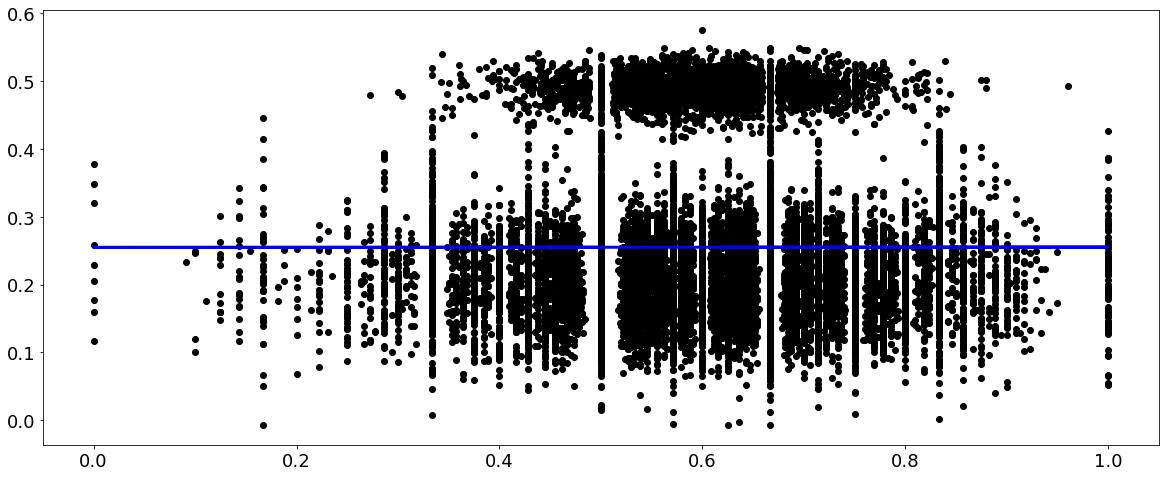

In [384]:
plt.scatter(X, y,  color='black')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
plt.show()

In [353]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [354]:
y

array([ 6,  8,  9, 11])